# Lab | Clustering songs

## Introduction

Now it's time to cluster the songs of the **hot_songs** and **not_hot_songs** databases according to the song's audio features. For this purpose, you need to consider the following questions:

* Are you going to use all the audio features? I
  * If not, which ones do you think that makes more sense to be used?
  * It might make sense to use a dimensionality reduction technique to visualize the songs with only two features?
* What is the optimal number of clusters (for methods that need to know this beforehand)?
* What is the best distance to use?
* What clustering method provides better results?
* Does the clustering method need a transformer?

## Considerations

Be aware that this process is extremely time-consuming!!! (it might take several hours on your laptop). Therefore, when testing different options, save the models into your disk in order to be able to use the best model later.  You don't want to retrain the best model again when you know what are the optimal parameters for each.

To determine which clustering method performs best, you need to be practical and think about how many clusters you might want to have alongside with a [clustering metric](https://analyticsindiamag.com/a-tutorial-on-various-clustering-evaluation-metrics/) to evaluate how good or bad the songs were clustered.
If the number of clusters is small, each cluster will be too big and generic. On the contrary, if the number of clusters is too big then each cluster will be too specific and it will be poorly populated (this also depends on how heterogeneous is your dataset).

On the other hand, when you train your clustering model make sure to concatenate both databases together (ie: **hot_songs** and **not_hot_songs**) before. 
If you don't combine both datasets, the clusters obtained with the **hot_songs** will be different than the ones obtained with the **not_hot_songs**
database even though they might have the same label because they will contain different songs. However, after this, you will not know to which original
dataframe belongs each song. To prevent this problem, before the concatenation you can add a new column named "dataset" with a "flag" to remind yourself in which dataset was included ("Hot", "Not hot")
each song. 

Finally, add a new column to the full dataset **for each clustering method with the cluster membership of each song** 


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# These are the same files we saved on our previous lab. They already have the audio features.
# They were renamed to hot_songs and not_hot_songs in order to avoid confusion.

hot_songs = pd.read_csv('hot_songs.csv')
not_hot_songs = pd.read_csv('not_hot_songs.csv')

In [3]:
# Add a new column on both dataframes in order to specify if it's a hot song or not

hot_songs['dataset'] = ['hot']*len(hot_songs)
not_hot_songs['dataset'] = ['not_hot']*len(not_hot_songs)

In [4]:
# Review values

hot_songs['dataset']

0     hot
1     hot
2     hot
3     hot
4     hot
     ... 
95    hot
96    hot
97    hot
98    hot
99    hot
Name: dataset, Length: 100, dtype: object

In [5]:
# Review values

not_hot_songs['dataset']

0       not_hot
1       not_hot
2       not_hot
3       not_hot
4       not_hot
         ...   
1990    not_hot
1991    not_hot
1992    not_hot
1993    not_hot
1994    not_hot
Name: dataset, Length: 1995, dtype: object

In [10]:
# Concatenate both dataframes

df = pd.concat([hot_songs, not_hot_songs], axis=0, ignore_index=True).drop(columns="Unnamed: 0")
df

artist                              title  danceability  energy  \
0        Brenda Lee  Rockin' Around The Christmas Tree         0.589   0.472   
1      Mariah Carey    All I Want For Christmas Is You         0.548   0.871   
2       Bobby Helms                   Jingle Bell Rock         0.754   0.424   
3             Wham!                     Last Christmas         0.735   0.478   
4         Burl Ives            A Holly Jolly Christmas         0.683   0.375   
...             ...                                ...           ...     ...   
2090  Stevie Wonder           Master Blaster (Jammin')         0.877   0.422   
2091     Neil Young                            Harvest         0.581   0.654   
2092      Radiohead                       High And Dry         0.419   0.383   
2093   Caro Emerald                  A Night Like This         0.870   0.706   
2094     Don Henley                    New York Minute         0.551   0.289   

      key  loudness  mode  speechiness  acousticness  instrumentalness  ...  \
0       8    -8.749     1       0.0502       0.61400          0.000000  ...   
1       7    -4.253     1       0.0708       0.00113          0.000000  ...   
2       2    -8.463     1       0.0363       0.64300          0.000000  ...   
3       2   -12.472     1       0.0293       0.18900          0.000002  ...   
4       0   -13.056     1       0.0303       0.57900          0.000000  ...   
...   ...       ...   ...          ...           ...               ...  ...   
2090   10   -14.933     0       0.0546       0.04000          0.000406  ...   
2091    0    -7.428     1       0.0249       0.18800          0.000461  ...   
2092    4   -11.782     1       0.0256       0.07240          0.017600  ...   
2093    1    -5.769     1       0.0417       0.56000          0.000000  ...   
2094    8   -12.214     0       0.0262       0.33400          0.000000  ...   

      valence    tempo            type                      id  \
0       0.898   67.196  audio_features  2EjXfH91m7f8HiJN1yQg97   
1       0.640  128.136  audio_features  7iKRL1F3m4t4dkMponnD0P   
2       0.806  119.705  audio_features  7vQbuQcyTflfCIOu3Uzzya   
3       0.947  107.682  audio_features  2FRnf9qhLbvw8fu4IBXx78   
4       0.888  140.467  audio_features  77khP2fIVhSW23NwxrRluh   
...       ...      ...             ...                     ...   
2090    0.970  131.103  audio_features  5EAgXGJ8Kw5QAfhQkZXYqT   
2091    0.620  104.996  audio_features  66RRhWLXx7OvJidJvhs7AE   
2092    0.350   87.568  audio_features  2a1iMaoWQ5MnvLFBDv4qkf   
2093    0.953  122.980  audio_features  7nuBU1HCcOwG5f1orN4ByW   
2094    0.117  132.133  audio_features  2jxqu3v4AZAhUNvdAbDGet   

                                       uri  \
0     spotify:track:2EjXfH91m7f8HiJN1yQg97   
1     spotify:track:7iKRL1F3m4t4dkMponnD0P   
2     spotify:track:7vQbuQcyTflfCIOu3Uzzya   
3     spotify:track:2FRnf9qhLbvw8fu4IBXx78   
4     spotify:track:77khP2fIVhSW23NwxrRluh   
...                                    ...   
2090  spotify:track:5EAgXGJ8Kw5QAfhQkZXYqT   
2091  spotify:track:66RRhWLXx7OvJidJvhs7AE   
2092  spotify:track:2a1iMaoWQ5MnvLFBDv4qkf   
2093  spotify:track:7nuBU1HCcOwG5f1orN4ByW   
2094  spotify:track:2jxqu3v4AZAhUNvdAbDGet   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/2EjXfH91m7f8...   
1     https://api.spotify.com/v1/tracks/7iKRL1F3m4t4...   
2     https://api.spotify.com/v1/tracks/7vQbuQcyTflf...   
3     https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...   
4     https://api.spotify.com/v1/tracks/77khP2fIVhSW...   
...                                                 ...   
2090  https://api.spotify.com/v1/tracks/5EAgXGJ8Kw5Q...   
2091  https://api.spotify.com/v1/tracks/66RRhWLXx7Ov...   
2092  https://api.spotify.com/v1/tracks/2a1iMaoWQ5Mn...   
2093  https://api.spotify.com/v1/tracks/7nuBU1HCcOwG...   
2094  https://api.spotify.com/v1/tracks/2jxqu3v4AZAh...   

                                           analy

In [11]:
# Review variable types

df.dtypes

artist               object
title                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dataset              object
dtype: object

In [8]:
# Review column names

df.columns

Index(['artist', 'title', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'dataset'],
      dtype='object')

In [12]:
# Drop columns that we won't use in our analysis

columns_to_drop = ['artist', 'title','type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'dataset']
X = df.drop(columns=columns_to_drop)

In [13]:
X.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.589   0.472    8    -8.749     1       0.0502       0.61400   
1         0.548   0.871    7    -4.253     1       0.0708       0.00113   
2         0.754   0.424    2    -8.463     1       0.0363       0.64300   
3         0.735   0.478    2   -12.472     1       0.0293       0.18900   
4         0.683   0.375    0   -13.056     1       0.0303       0.57900   

   instrumentalness  liveness  valence    tempo  
0          0.000000    0.5050    0.898   67.196  
1          0.000000    0.7650    0.640  128.136  
2          0.000000    0.0652    0.806  119.705  
3          0.000002    0.3550    0.947  107.682  
4          0.000000    0.0760    0.888  140.467

In [14]:
X.describe()

danceability       energy          key     loudness         mode  \
count   2095.000000  2095.000000  2095.000000  2095.000000  2095.000000   
mean       0.539807     0.600369     5.201909    -8.879642     0.683055   
std        0.157514     0.220377     3.552955     3.688505     0.465397   
min        0.074600     0.007790     0.000000   -31.544000     0.000000   
25%        0.427000     0.428500     2.000000   -11.037500     0.000000   
50%        0.544000     0.621000     5.000000    -8.277000     1.000000   
75%        0.654000     0.780500     8.000000    -6.158500     1.000000   
max        0.956000     0.999000    11.000000    -1.248000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  2095.000000   2095.000000       2095.000000  2095.000000  2095.000000   
mean      0.053349      0.289573          0.051566     0.195109     0.495631   
std       0.050899      0.290457          0.164544     0.177381     0.248426   
min       0.023100      0.000005          0.000000     0.023200     0.033200   
25%       0.031100      0.033800          0.000000     0.093850     0.288000   
50%       0.036900      0.182000          0.000083     0.125000     0.478000   
75%       0.052850      0.498000          0.004030     0.226000     0.690000   
max       0.674000      0.994000          0.985000     0.992000     0.985000   

             tempo  
count  2095.000000  
mean    120.864865  
std      28.588354  
min      48.718000  
25%      99.479000  
50%     119.917000  
75%     136.996500  
max     205.914000

In [15]:
# Transform data for consistency

import pickle

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "audio_features.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.589   0.472    8    -8.749     1       0.0502       0.61400   
1         0.548   0.871    7    -4.253     1       0.0708       0.00113   
2         0.754   0.424    2    -8.463     1       0.0363       0.64300   
3         0.735   0.478    2   -12.472     1       0.0293       0.18900   
4         0.683   0.375    0   -13.056     1       0.0303       0.57900   

   instrumentalness  liveness  valence    tempo  
0          0.000000    0.5050    0.898   67.196  
1          0.000000    0.7650    0.640  128.136  
2          0.000000    0.0652    0.806  119.705  
3          0.000002    0.3550    0.947  107.682  
4          0.000000    0.0760    0.888  140.467

danceability    energy       key  loudness      mode  speechiness  \
0      0.312381 -0.582634  0.787727  0.035427  0.681184    -0.061889   
1      0.052024  1.228330  0.506204  1.254640  0.681184     0.342935   
2      1.360161 -0.800494 -0.901411  0.112984  0.681184    -0.335047   
3      1.239507 -0.555401 -0.901411 -0.974166  0.681184    -0.472608   
4      0.909298 -1.022893 -1.464457 -1.132533  0.681184    -0.452956   

   acousticness  instrumentalness  liveness   valence     tempo  
0      1.117222         -0.313465  1.747451  1.620058 -1.877746  
1     -0.993305         -0.313465  3.213570  0.581272  0.254400  
2      1.217088         -0.313465 -0.732547  1.249638 -0.040581  
3     -0.346341         -0.313450  0.901613  1.817347 -0.461237  
4      0.996693         -0.313465 -0.671646  1.579795  0.685832

## PCA - Principal Component Analysis

Computes the covariance matrix and applies a mathematical transformation to make it look "diagonal". This gives a new set of features callled principal components that
* are not correlated
* can explain a decreasing amount of variance (variability of you data)
* is a linear combination of the old feature.

In [16]:
from sklearn.decomposition import PCA

# When we create an instance of PCA, we can specify how many principal components we want to extract.
# However, as we don't know beforehand how much variance it will explain each principal component it's
# allways better to not set the option "n_components" to a given integer number.

pca = PCA()
pca.fit(X_scaled_df)
principal_components = pca.transform(X_scaled_df)
principal_components_df = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,X_scaled_df.shape[1]+1)])
principal_components_df.head()

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0  0.347009 -1.084091 -1.096167  1.764710 -0.142854  1.227386 -1.668292   
1 -2.372592  1.525528 -0.883244  1.399714  0.418229  1.069500 -1.483494   
2  0.471330 -1.920101 -1.223329 -0.252859  0.653696 -0.606469  0.262881   
3 -0.116546 -1.654216 -1.504118  0.044902  1.000215  0.679997 -0.437943   
4  1.000138 -1.766961 -1.259898 -0.588613  1.501169 -0.851298  0.608267   

      PCA_8     PCA_9    PCA_10    PCA_11  
0 -0.774977  0.768826 -0.750160  0.633441  
1 -1.076917 -0.034629  0.542480  0.259899  
2 -0.277481  0.992959  0.177894  0.378922  
3 -1.190739 -0.773305 -0.114895  0.377194  
4 -0.979400  0.117765 -0.273322  0.161936

In [17]:
print(pca.explained_variance_ratio_)

[0.23793302 0.13133074 0.1063519  0.09489163 0.08957211 0.08827265
 0.07880121 0.07372745 0.04568719 0.03933642 0.01409568]


#### It's investigated how much variance of the data can be explained with a subset of PCA's.

In [18]:
cumulated_explained_variance_ratio = [sum(pca.explained_variance_ratio_[0:i+1]) for i,value in enumerate(pca.explained_variance_ratio_)]
cumulated_explained_variance_ratio

[0.23793302140046782,
 0.3692637567134245,
 0.47561566062847616,
 0.5705072922017531,
 0.6600794020846811,
 0.7483520501506968,
 0.8271532621778328,
 0.9008807111879964,
 0.9465679008867538,
 0.9859043184009024,
 0.9999999999999997]

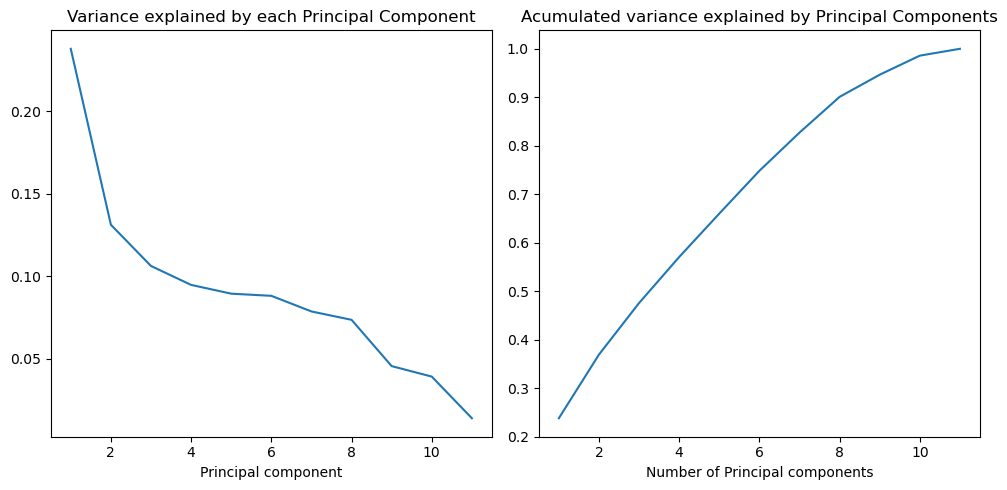

In [19]:
# Plot charts

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(np.arange(1,12), pca.explained_variance_ratio_)
ax[0].set_xlabel("Principal component")
ax[0].set_title("Variance explained by each Principal Component")
ax[1].plot(np.arange(1,12),cumulated_explained_variance_ratio)
ax[1].set_title("Acumulated variance explained by Principal Components")
ax[1].set_xlabel("Number of Principal components")
plt.tight_layout()
plt.show()

#### We would like to explain around 80% or more variance of data with a few PCAs:

With 2 PCA features we can only explain 37% of the data, with 3 features only 46%. This is not even close to 80%.
The 80% are reached with 7 PCA features. This is too much, therefore **the PCA method is not useful**. 

## ISOMAP

It generates a new set of features that "locally" respects the difference between the observations with original features.

In [20]:
# Let's check if another dimensionality reduction technique suits our data better

from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=5, n_components=2)
# best practice: choose n_neighbors between 8-12
iso.fit(X)
X_isomap_transformed = iso.transform(X)
X_isomap_transformed_df = pd.DataFrame(X_isomap_transformed, columns=["ISO_1","ISO_2"])
X_isomap_transformed_df.head()

ISO_1     ISO_2
0 -69.825080  4.301003
1   8.444297 -6.218307
2  -2.047872  4.342840
3 -17.165626  2.917484
4  28.166089  4.992680

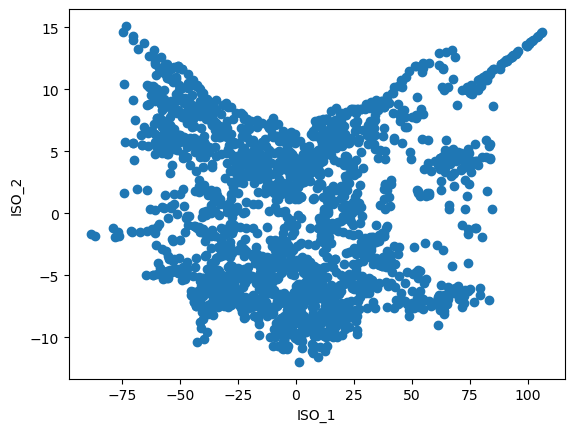

In [21]:
# Let's review this data in a scatterplot

fig, ax = plt.subplots()
ax.scatter(X_isomap_transformed_df['ISO_1'],X_isomap_transformed_df['ISO_2'])
ax.set_xlabel("ISO_1")
ax.set_ylabel("ISO_2")
plt.show()

ISOMAP is also not suitable

## UMAP

The method associates a Gaussian probability to each pair of observations.
It generates a new set of features Z's in such a way that when a new set of probabilities in the Z's resambles the original probabilities.

In [22]:
# Let's try with another technique

from umap import UMAP

reducer = UMAP(n_neighbors=5, n_components=2,random_state=42)
reducer.fit(X)

X_umap_transformed = reducer.transform(X)
X_umap_transformed_df = pd.DataFrame(X_umap_transformed, columns=["UMAP_1","UMAP_2"])

filename = "umap.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(X_umap_transformed,file)

/Users/lucia/anaconda3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/lucia/anaconda3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/lucia/anaconda3/lib/python3.11/site-packages/umap/distances.py:1086: NumbaDeprecationWa

In [31]:
# Save the entire UMAP model

filename = "umap_model.pickle"  # Path with filename
with open(filename, "wb") as file:
    pickle.dump(reducer, file)

In [32]:
# I got some different values in comparison with my team members - Probably because of the
# previous warning or because this method is probabilistic

X_umap_transformed_df.head()

UMAP_1     UMAP_2
0  -3.005601  14.619786
1   5.161488  -5.840945
2   3.513930  -2.624957
3   1.621683   0.044489
4  13.322855   1.287669

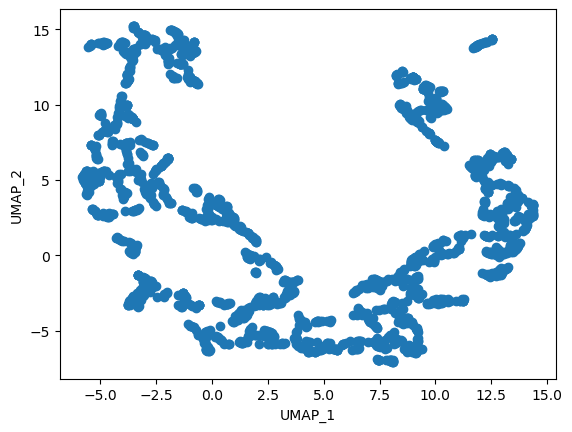

In [33]:
# Let's review the data with a scatterplot (looks very similar to my colleagues)

fig, ax = plt.subplots()
ax.scatter(X_umap_transformed_df['UMAP_1'],X_umap_transformed_df['UMAP_2'])
ax.set_xlabel("UMAP_1")
ax.set_ylabel("UMAP_2")
plt.show()

# Clustering
## K-Means
Devides the data set into K-clusters.

It's an iterative method that applies a set of steps over and over.
* creates k random locations (centroids)
* computes the distance between every observation and each centroid.
* every observation is associated to nearest centroid
* centroids locations are updated to be the mean location of all observations assoiciated to it.

How to determine the right number of K:
* business knowledge
* elbow method
* silhouette score

In [34]:
X.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.589   0.472    8    -8.749     1       0.0502       0.61400   
1         0.548   0.871    7    -4.253     1       0.0708       0.00113   
2         0.754   0.424    2    -8.463     1       0.0363       0.64300   
3         0.735   0.478    2   -12.472     1       0.0293       0.18900   
4         0.683   0.375    0   -13.056     1       0.0303       0.57900   

   instrumentalness  liveness  valence    tempo  cluster  
0          0.000000    0.5050    0.898   67.196        4  
1          0.000000    0.7650    0.640  128.136        6  
2          0.000000    0.0652    0.806  119.705        4  
3          0.000002    0.3550    0.947  107.682        4  
4          0.000000    0.0760    0.888  140.467        4

In [35]:
# Let's apply the first clustering method
# We selected 8 n_clusters randomly

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=1234)

In [36]:
# After some testing, we arrive to the conclusion that n_clusters = 8 was predicting the best
# sizes of clusters

clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    293
1    329
2    399
3     99
4    435
5     51
6    132
7    357
Name: count, dtype: int64

In [37]:
X["cluster"] = clusters
X.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.589   0.472    8    -8.749     1       0.0502       0.61400   
1         0.548   0.871    7    -4.253     1       0.0708       0.00113   
2         0.754   0.424    2    -8.463     1       0.0363       0.64300   
3         0.735   0.478    2   -12.472     1       0.0293       0.18900   
4         0.683   0.375    0   -13.056     1       0.0303       0.57900   

   instrumentalness  liveness  valence    tempo  cluster  
0          0.000000    0.5050    0.898   67.196        4  
1          0.000000    0.7650    0.640  128.136        6  
2          0.000000    0.0652    0.806  119.705        4  
3          0.000002    0.3550    0.947  107.682        4  
4          0.000000    0.0760    0.888  140.467        4

In [38]:
# Let's calculate inertia

kmeans.inertia_

12402.423854028495

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 28153.026938902607.
Iteration 1, inertia 19346.623648914836.
Iteration 2, inertia 19266.144447342514.
Iteration 3, inertia 19245.733116624197.
Iteration 4, inertia 19241.015408712163.
Iteration 5, inertia 19239.36668661508.
Iteration 6, inertia 19238.576004240727.
Iteration 7, inertia 19237.885425698965.
Iteration 8, inertia 19237.398458317977.
Iteration 9, inertia 19237.278452848732.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 43779.27987697776.
Iteration 1, inertia 21498.274669160885.
Iteration 2, inertia 21476.376330193438.
Iteration 3, inertia 21471.302055469954.
Iteration 4, inertia 21470.72119439546.
Iteration 5, inertia 21470.59450700058.
Iteration 6, inertia 21470.252104301886.
Iteration 7, inertia 21468.0296744873.
Iteration 8, inertia 21465.348570310474.
Iteration 9, inertia 21462.62386168653.
Iteration 10, inertia 21455.592686816115.
Iterati

/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 5 clusters! 

Initialization complete
Iteration 0, inertia 20915.356614928987.
Iteration 1, inertia 16694.193602869913.
Iteration 2, inertia 16475.57785451965.
Iteration 3, inertia 16407.163805866272.
Iteration 4, inertia 16366.423731358756.
Iteration 5, inertia 16338.340452636838.
Iteration 6, inertia 16316.992723186813.
Iteration 7, inertia 16298.930385995245.
Iteration 8, inertia 16265.282582843489.
Iteration 9, inertia 16222.326477186853.
Iteration 10, inertia 16170.189201959112.
Iteration 11, inertia 16097.10916892843.
Iteration 12, inertia 16041.299603670846.
Iteration 13, inertia 16023.086849849997.
Iteration 14, inertia 16015.350518145067.
Iteration 15, inertia 16011.310246633804.
Iteration 16, inertia 16008.134779119739.
Iteration 17, inertia 16006.407062588527.
Iteration 18, inertia 16004.21224668364.
Iteration 19, inertia 16003.017680563418.
Iteration 20, inertia 16001.63414694748.
Iteration 21, inertia 16000.795125650453.
Iteration 22, inertia 

/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 14, inertia 13665.009122260213.
Iteration 15, inertia 13661.025935759779.
Iteration 16, inertia 13657.173544389421.
Iteration 17, inertia 13652.590685376465.
Iteration 18, inertia 13647.787426439827.
Iteration 19, inertia 13644.630445813735.
Iteration 20, inertia 13638.932389520232.
Iteration 21, inertia 13632.762849364059.
Iteration 22, inertia 13625.929857364985.
Iteration 23, inertia 13619.404947154057.
Iteration 24, inertia 13613.99097734543.
Iteration 25, inertia 13611.214462265405.
Iteration 26, inertia 13609.250946130767.
Iteration 27, inertia 13607.106189034235.
Iteration 28, inertia 13605.541564632065.
Iteration 29, inertia 13604.00889178197.
Iteration 30, inertia 13603.260348986447.
Iteration 31, inertia 13602.97744517972.
Iteration 32, inertia 13602.854656871403.
Converged at iteration 32: center shift 5.4955086683412704e-05 within tolerance 9.999999999999976e-05.
Initialization complete
Iteration 0, inertia 21515.07515090728.
Iteration 1, inertia 14691.55191070737

/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 48, inertia 12019.795934413607.
Iteration 49, inertia 12019.703900272101.
Converged at iteration 49: center shift 7.745417416169165e-05 within tolerance 9.999999999999976e-05.
Initialization complete
Iteration 0, inertia 18114.782272748635.
Iteration 1, inertia 13419.738661881824.
Iteration 2, inertia 13019.494683849041.
Iteration 3, inertia 12854.4222595965.
Iteration 4, inertia 12779.159028319053.
Iteration 5, inertia 12727.667828234387.
Iteration 6, inertia 12703.575172106437.
Iteration 7, inertia 12686.247678043987.
Iteration 8, inertia 12670.844837333352.
Iteration 9, inertia 12660.839724117453.
Iteration 10, inertia 12653.712124315554.
Iteration 11, inertia 12648.691511102072.
Iteration 12, inertia 12643.85511157112.
Iteration 13, inertia 12638.38712911239.
Iteration 14, inertia 12634.555311659717.
Iteration 15, inertia 12632.07548856559.
Iteration 16, inertia 12629.78852483422.
Iteration 17, inertia 12628.639248433145.
Iteration 18, inertia 12627.851222137784.
Iteratio

/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 11, inertia 12134.068171738698.
Iteration 12, inertia 12105.98082730842.
Iteration 13, inertia 12050.953912962403.
Iteration 14, inertia 11962.266553388881.
Iteration 15, inertia 11786.680849657198.
Iteration 16, inertia 11502.236542348171.
Iteration 17, inertia 11333.685318425196.
Iteration 18, inertia 11299.696041318239.
Iteration 19, inertia 11281.434901152488.
Iteration 20, inertia 11270.37029663329.
Iteration 21, inertia 11262.703379992883.
Iteration 22, inertia 11257.38982677663.
Iteration 23, inertia 11255.296635288621.
Iteration 24, inertia 11254.47977046965.
Iteration 25, inertia 11253.565277955773.
Iteration 26, inertia 11252.84912144924.
Iteration 27, inertia 11251.819354892737.
Iteration 28, inertia 11250.587888394892.
Iteration 29, inertia 11248.864194782844.
Iteration 30, inertia 11248.347848908084.
Iteration 31, inertia 11247.800040941978.
Iteration 32, inertia 11247.41736901649.
Iteration 33, inertia 11246.964889757699.
Iteration 34, inertia 11246.50547931603.

/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 23, inertia 11558.250506088014.
Iteration 24, inertia 11554.365954997349.
Iteration 25, inertia 11551.192895088016.
Iteration 26, inertia 11543.187198342712.
Iteration 27, inertia 11534.08908586283.
Iteration 28, inertia 11527.096712525085.
Iteration 29, inertia 11520.554033860151.
Iteration 30, inertia 11511.596852603485.
Iteration 31, inertia 11507.571719072666.
Iteration 32, inertia 11504.009849078682.
Iteration 33, inertia 11501.993557588738.
Iteration 34, inertia 11501.050116697963.
Iteration 35, inertia 11500.805817789194.
Iteration 36, inertia 11500.214719231728.
Iteration 37, inertia 11498.51120261875.
Iteration 38, inertia 11495.806415026616.
Iteration 39, inertia 11490.218640699317.
Iteration 40, inertia 11481.47505994338.
Iteration 41, inertia 11448.088006209331.
Iteration 42, inertia 11324.201923930663.
Iteration 43, inertia 10985.394392438648.
Iteration 44, inertia 10797.62365554902.
Iteration 45, inertia 10754.822472800504.
Iteration 46, inertia 10724.3494697374

/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 22, inertia 10185.897967886896.
Iteration 23, inertia 10185.768557847277.
Iteration 24, inertia 10185.350571784136.
Iteration 25, inertia 10184.90118745482.
Iteration 26, inertia 10184.617307468776.
Iteration 27, inertia 10184.349503592694.
Iteration 28, inertia 10183.629300859931.
Iteration 29, inertia 10182.69338256307.
Iteration 30, inertia 10181.287009613283.
Iteration 31, inertia 10179.957644398397.
Iteration 32, inertia 10179.105557566134.
Iteration 33, inertia 10178.667355778212.
Iteration 34, inertia 10178.440792660262.
Iteration 35, inertia 10178.052948294699.
Iteration 36, inertia 10176.444173800883.
Iteration 37, inertia 10175.177202325389.
Iteration 38, inertia 10174.581817305945.
Iteration 39, inertia 10173.790748076186.
Iteration 40, inertia 10173.07745555156.
Iteration 41, inertia 10172.72424178297.
Iteration 42, inertia 10171.795197027455.
Iteration 43, inertia 10170.819866836726.
Iteration 44, inertia 10170.01713023357.
Iteration 45, inertia 10169.69165974325

/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 13830.998550144515.
Iteration 1, inertia 10489.673089467145.
Iteration 2, inertia 10070.941502047383.
Iteration 3, inertia 9908.44763510782.
Iteration 4, inertia 9838.783295128247.
Iteration 5, inertia 9800.934023421481.
Iteration 6, inertia 9765.044730313757.
Iteration 7, inertia 9730.533096756364.
Iteration 8, inertia 9711.260866183022.
Iteration 9, inertia 9698.118699304883.
Iteration 10, inertia 9687.962462626527.
Iteration 11, inertia 9678.185018284372.
Iteration 12, inertia 9674.728895064738.
Iteration 13, inertia 9670.770680576452.
Iteration 14, inertia 9667.840524148924.
Iteration 15, inertia 9665.119587420038.
Iteration 16, inertia 9662.332867019904.
Iteration 17, inertia 9659.304718160525.
Iteration 18, inertia 9657.670712333143.
Iteration 19, inertia 9657.010758297281.
Iteration 20, inertia 9656.677312765276.
Iteration 21, inertia 9656.509970107547.
Iteration 22, inertia 9656.343487698889.
Converged at iteration 22: strict converg

/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lucia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 6, inertia 9482.49596006537.
Iteration 7, inertia 9465.486364051723.
Iteration 8, inertia 9452.82688262344.
Iteration 9, inertia 9442.528773174039.
Iteration 10, inertia 9434.820835499071.
Iteration 11, inertia 9427.51671224583.
Iteration 12, inertia 9422.552182159221.
Iteration 13, inertia 9419.29152763739.
Iteration 14, inertia 9416.335226961359.
Iteration 15, inertia 9412.962223248705.
Iteration 16, inertia 9410.332471013535.
Iteration 17, inertia 9409.964902847069.
Iteration 18, inertia 9409.378108526598.
Iteration 19, inertia 9408.61655455989.
Iteration 20, inertia 9408.003386290202.
Iteration 21, inertia 9407.54574642331.
Iteration 22, inertia 9407.036946590983.
Iteration 23, inertia 9405.978662041023.
Iteration 24, inertia 9404.356227821507.
Iteration 25, inertia 9403.992025061292.
Iteration 26, inertia 9403.842166658262.
Converged at iteration 26: strict convergence.
Initialization complete
Iteration 0, inertia 13273.221796539274.
Iteration 1, inertia 10445.1113670100

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

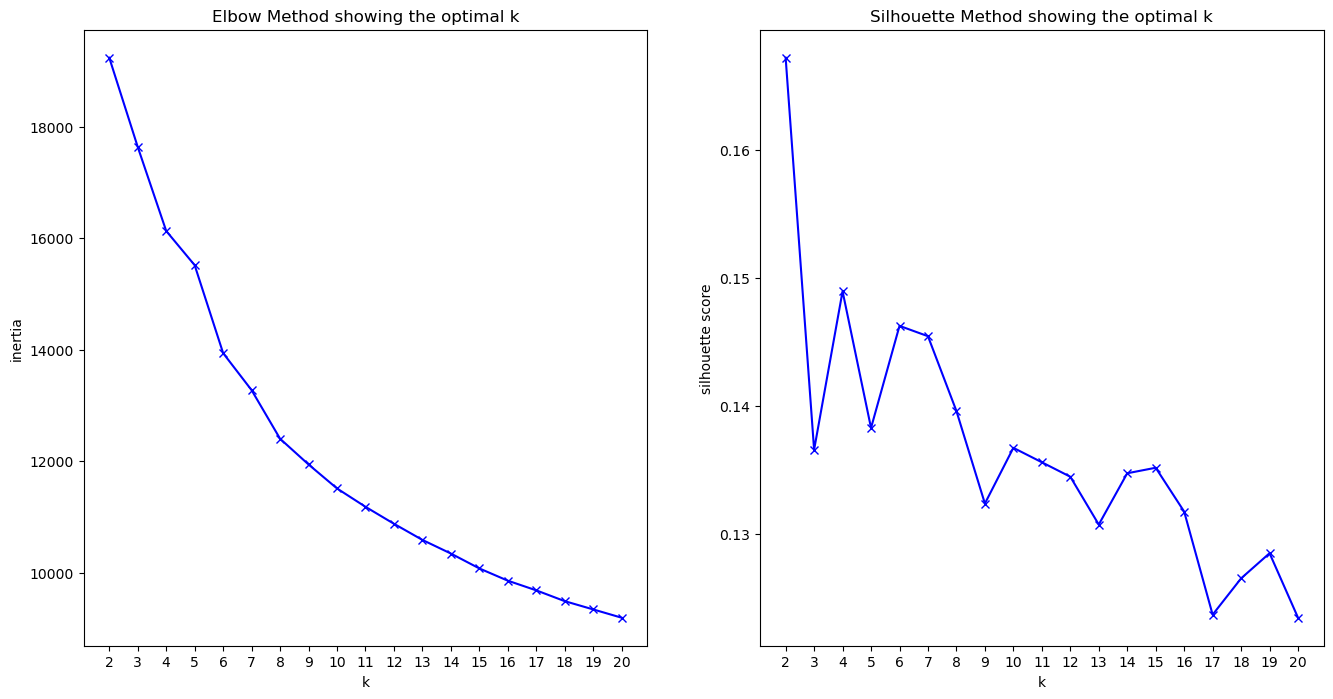

/Users/alinaaufenanger/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 35, inertia 9376.797587837678.
Iteration 36, inertia 9376.413740658303.
Iteration 37, inertia 9375.525905140337.
Iteration 38, inertia 9374.951083714403.
Iteration 39, inertia 9374.526637253195.
Iteration 40, inertia 9373.48394453416.
Iteration 41, inertia 9373.086557960387.
Iteration 42, inertia 9372.503843403021.
Iteration 43, inertia 9371.713059182064.
Iteration 44, inertia 9370.12823013178.
Iteration 45, inertia 9368.291032484485.
Iteration 46, inertia 9367.789819991165.
Iteration 47, inertia 9366.729257375006.
Iteration 48, inertia 9366.183969103484.
Iteration 49, inertia 9365.576252611196.
Iteration 50, inertia 9364.924294157901.
Iteration 51, inertia 9364.427773775511.
Iteration 52, inertia 9364.070613997348.
Iteration 53, inertia 9363.99080969319.
Iteration 54, inertia 9363.932223055213.
Converged at iteration 54: strict convergence.
Initialization complete
Iteration 0, inertia 12845.7441893549.
Iteration 1, inertia 10086.73608563276.
Iteration 2, inertia 9709.4565817

Iteration 31, inertia 9323.568040071743.
Iteration 32, inertia 9323.295595436612.
Iteration 33, inertia 9322.583314798787.
Iteration 34, inertia 9320.953113244512.
Iteration 35, inertia 9319.530133610882.
Iteration 36, inertia 9317.860041817145.
Iteration 37, inertia 9317.383377025193.
Iteration 38, inertia 9316.333187277472.
Iteration 39, inertia 9314.809935963602.
Iteration 40, inertia 9312.758620536095.
Iteration 41, inertia 9311.234705290733.
Iteration 42, inertia 9309.636468080887.
Iteration 43, inertia 9307.912452587356.
Iteration 44, inertia 9307.069117939653.
Iteration 45, inertia 9306.750343592197.
Iteration 46, inertia 9306.377480155761.
Iteration 47, inertia 9306.205014215713.
Iteration 48, inertia 9305.984585809747.
Iteration 49, inertia 9305.573830353325.
Iteration 50, inertia 9305.302069012867.
Iteration 51, inertia 9304.524344936064.
Iteration 52, inertia 9303.355831839734.
Iteration 53, inertia 9302.907828944448.
Iteration 54, inertia 9302.789789391394.
Iteration 55, in

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

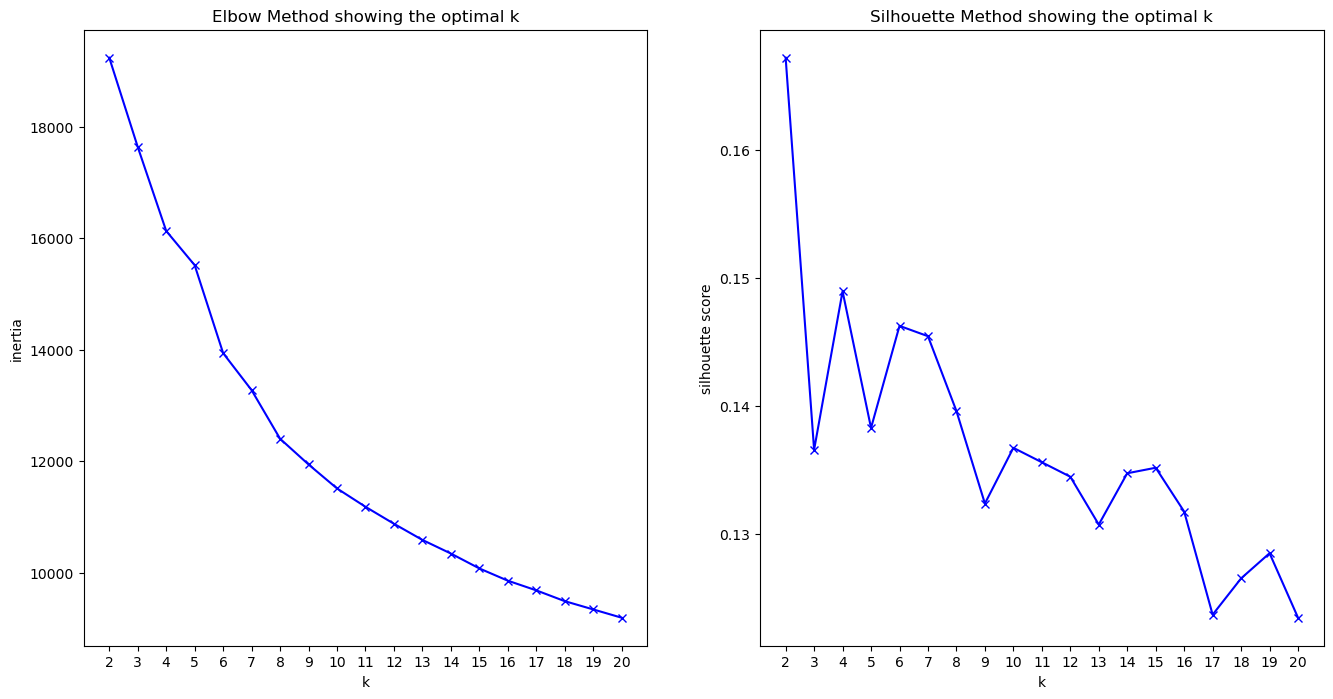

In [39]:
# Train the K_Means

K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)

    filename = "kmeans_" + str(k) + ".pickle" # Path with filename # kmeans_n.pickle
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))
    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

The elbow method sugest to use **k=4**, and then a very slight one at **k=6**, but other than that the plot is quite smooth. 

On the other hand, the Silhouette method also shows a peak at **k=2**.
However, the Silhoette score is not too close to 1. This might indicate a poor clustering.

The two methods are not really consistent.

It seems like the K-Means method is not really suitable for clustering the songs.

In [40]:
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle
#from dbcv import *

we continue with the UMAP transformed df

In [41]:
X_umap_transformed_df.describe()

UMAP_1       UMAP_2
count  2095.000000  2095.000000
mean      3.753152     2.714887
std       6.322294     6.366090
min      -5.793322    -7.075952
25%      -2.291593    -2.839316
50%       2.699404     2.341716
75%       9.424852     7.461085
max      14.376181    15.230195

## DBSCAN

In [42]:
# Let's test the DBSCAN clustering method

# Scaling features
#scaler = StandardScaler()
#scaler.fit(X_umap_transformed_df)
#X_scaled_np = scaler.transform(X_umap_transformed_df)
#X_scaled_df = pd.DataFrame(X_scaled_np, columns=X_df.columns)

# Creating the clustering model
model = DBSCAN() # Default values are: eps=0.5, min_samples=5
# fit model and predict clusters
yhat = model.fit_predict(X_umap_transformed_df) # .fit(X_scaled_df)

In [43]:
# As it was explained in a previous cell, I also got here some different values from my colleagues

X_umap_transformed_df.head()

UMAP_1     UMAP_2
0  -3.005601  14.619786
1   5.161488  -5.840945
2   3.513930  -2.624957
3   1.621683   0.044489
4  13.322855   1.287669

In [44]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_umap_transformed_df, model.fit_predict(X_umap_transformed_df)),2))
print("The Calinksi-Harabasz score of the model is: ",round(calinski_harabasz_score(X_umap_transformed_df, model.fit_predict(X_umap_transformed_df)),2))

The Silhouette score of the model is:  0.25
The Calinksi-Harabasz score of the model is:  2440.65


The Silhoette score returns values in the range [-1,1], while the Calinski-Harabasz returns values in the range [0, inf). Therefore their scales are not comparable. However, in both cases, the higher the values, the better.

Our model is not great.

In [45]:
yhat

array([ 0,  1,  2, ..., 23, 25, 16])

In [46]:
X.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.589   0.472    8    -8.749     1       0.0502       0.61400   
1         0.548   0.871    7    -4.253     1       0.0708       0.00113   
2         0.754   0.424    2    -8.463     1       0.0363       0.64300   
3         0.735   0.478    2   -12.472     1       0.0293       0.18900   
4         0.683   0.375    0   -13.056     1       0.0303       0.57900   

   instrumentalness  liveness  valence    tempo  cluster  
0          0.000000    0.5050    0.898   67.196        4  
1          0.000000    0.7650    0.640  128.136        6  
2          0.000000    0.0652    0.806  119.705        4  
3          0.000002    0.3550    0.947  107.682        4  
4          0.000000    0.0760    0.888  140.467        4

In [47]:
X['dbscan_clusters'] = yhat
X.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.589   0.472    8    -8.749     1       0.0502       0.61400   
1         0.548   0.871    7    -4.253     1       0.0708       0.00113   
2         0.754   0.424    2    -8.463     1       0.0363       0.64300   
3         0.735   0.478    2   -12.472     1       0.0293       0.18900   
4         0.683   0.375    0   -13.056     1       0.0303       0.57900   

   instrumentalness  liveness  valence    tempo  cluster  dbscan_clusters  
0          0.000000    0.5050    0.898   67.196        4                0  
1          0.000000    0.7650    0.640  128.136        6                1  
2          0.000000    0.0652    0.806  119.705        4                2  
3          0.000002    0.3550    0.947  107.682        4                3  
4          0.000000    0.0760    0.888  140.467        4                4

In [48]:
# Review unique number of clusters

cluster_dbscan = np.unique(yhat)
cluster_dbscan

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [37]:
# Review total number of clusters

[cluster_dbscan for cluster_dbscan in list(cluster_dbscan) if cluster_dbscan != -1]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

In [50]:
cluster_dbscan.size - 1

30

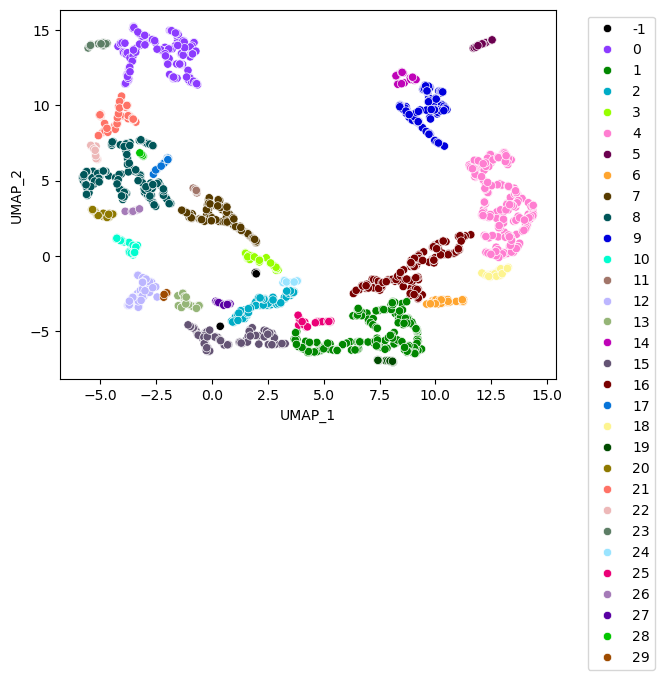

In [51]:
# Plot number of clusters

X_umap_transformed_df["dbscan_clusters"] = yhat
# Creating a pallette of hihg contrast colors with as many color as cluster labels
custom_palette_1 = sns.color_palette(cc.glasbey, n_colors=cluster_dbscan.size)
# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1" #(R,G,B)
custom_palette_1 = [color if cluster_dbscan != -1 else (0.,0.,0.) for cluster_dbscan, color in zip(cluster_dbscan,custom_palette_1)]
sns.scatterplot(X_umap_transformed_df, x="UMAP_1", y="UMAP_2", hue="dbscan_clusters", palette=custom_palette_1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.show()

The 'distances' array is an 2D-array containing as many rows as points and as many columns as mins_samples (2095, 4)


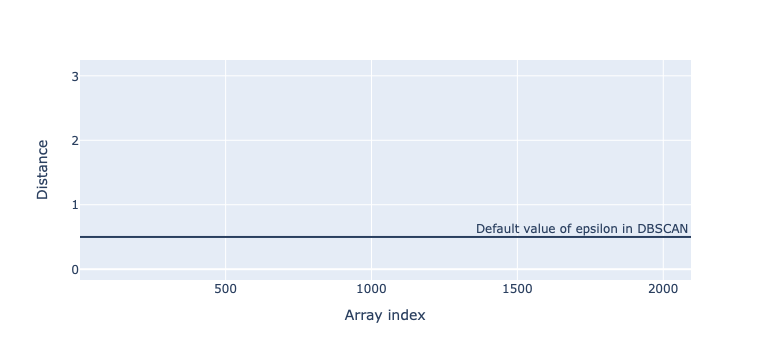

In [52]:
# Review charts in order to understand what's the value of epsilon

from sklearn.neighbors import NearestNeighbors
import plotly.express as px

neighbors = 4 # The value of MinPoints or mins_samples = 2 * number_of_columns
# X_embedded is your data
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(X_umap_transformed_df)
distances, indices = nbrs.kneighbors(X_umap_transformed_df)
print("The 'distances' array is an 2D-array containing as many rows as points and as many columns as mins_samples", distances.shape)
distance_desc = sorted(distances[:,neighbors-1], reverse=True)
fig = px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc).update_layout(
    xaxis_title="Array index", yaxis_title="Distance"
)
fig.add_hline(y=0.5, annotation_text="Default value of epsilon in DBSCAN") #0.5 is always the default epsilon
fig.show()

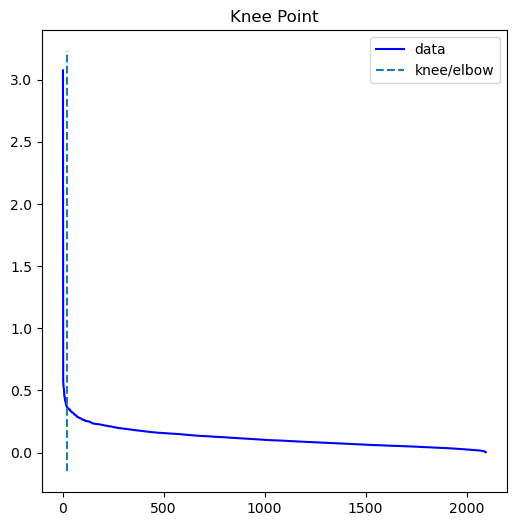

In [53]:
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure (see https://mmerevise.co.uk/a-level-maths-revision/convex-and-concave-curves/)
                      direction="decreasing") #parameter from figure

kneedle.plot_knee()

In [54]:
print("The epsilon value for which the distance plot has the biggest change in the slope is: {:.2f}".format(kneedle.knee_y))

The epsilon value for which the distance plot has the biggest change in the slope is: 0.36


The epsilon is lower than the default value

In [55]:
from sklearn.datasets import make_classification
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle

In [56]:
X_umap_transformed_df.drop(columns=["dbscan_clusters"], inplace=True)

In [57]:
X_umap_transformed_df.head()

UMAP_1     UMAP_2
0  -3.005601  14.619786
1   5.161488  -5.840945
2   3.513930  -2.624957
3   1.621683   0.044489
4  13.322855   1.287669

In [58]:
# Creating the clustering model for the HDBSCAN clustering method

model_2 = HDBSCAN() # Default values are: eps=0.5, min_samples=5
# fit model and predict clusters
yhat_2 = model_2.fit_predict(X_umap_transformed_df) # .fit(X_scaled_df)

In [59]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_umap_transformed_df, model_2.fit_predict(X_umap_transformed_df)),2))
print("The Calinksi-Harabasz score of the model is: ",round(calinski_harabasz_score(X_umap_transformed_df, model_2.fit_predict(X_umap_transformed_df)),2))

The Silhouette score of the model is:  0.45
The Calinksi-Harabasz score of the model is:  94.5


In [60]:
yhat_2

array([ 46,  -1,  53, ...,   8,  88, 140])

In [61]:
X['hdbscan_clusters'] = yhat_2
X.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.589   0.472    8    -8.749     1       0.0502       0.61400   
1         0.548   0.871    7    -4.253     1       0.0708       0.00113   
2         0.754   0.424    2    -8.463     1       0.0363       0.64300   
3         0.735   0.478    2   -12.472     1       0.0293       0.18900   
4         0.683   0.375    0   -13.056     1       0.0303       0.57900   

   instrumentalness  liveness  valence    tempo  cluster  dbscan_clusters  \
0          0.000000    0.5050    0.898   67.196        4                0   
1          0.000000    0.7650    0.640  128.136        6                1   
2          0.000000    0.0652    0.806  119.705        4                2   
3          0.000002    0.3550    0.947  107.682        4                3   
4          0.000000    0.0760    0.888  140.467        4                4   

   hdbscan_clusters  
0                46  
1                -1  
2                53  
3                51  
4               116

In [62]:
# Retrieve unique clusters

cluster_hdbscan = np.unique(yhat_2)
cluster_hdbscan # DBSCAN flags with "-1" noisy data.

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169])

In [55]:
[cluster_hdbscan for cluster_hdbscan in list(cluster_hdbscan) if cluster_hdbscan != -1]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175]

In [63]:
# Review number of clusters

cluster_hdbscan.size - 1

170

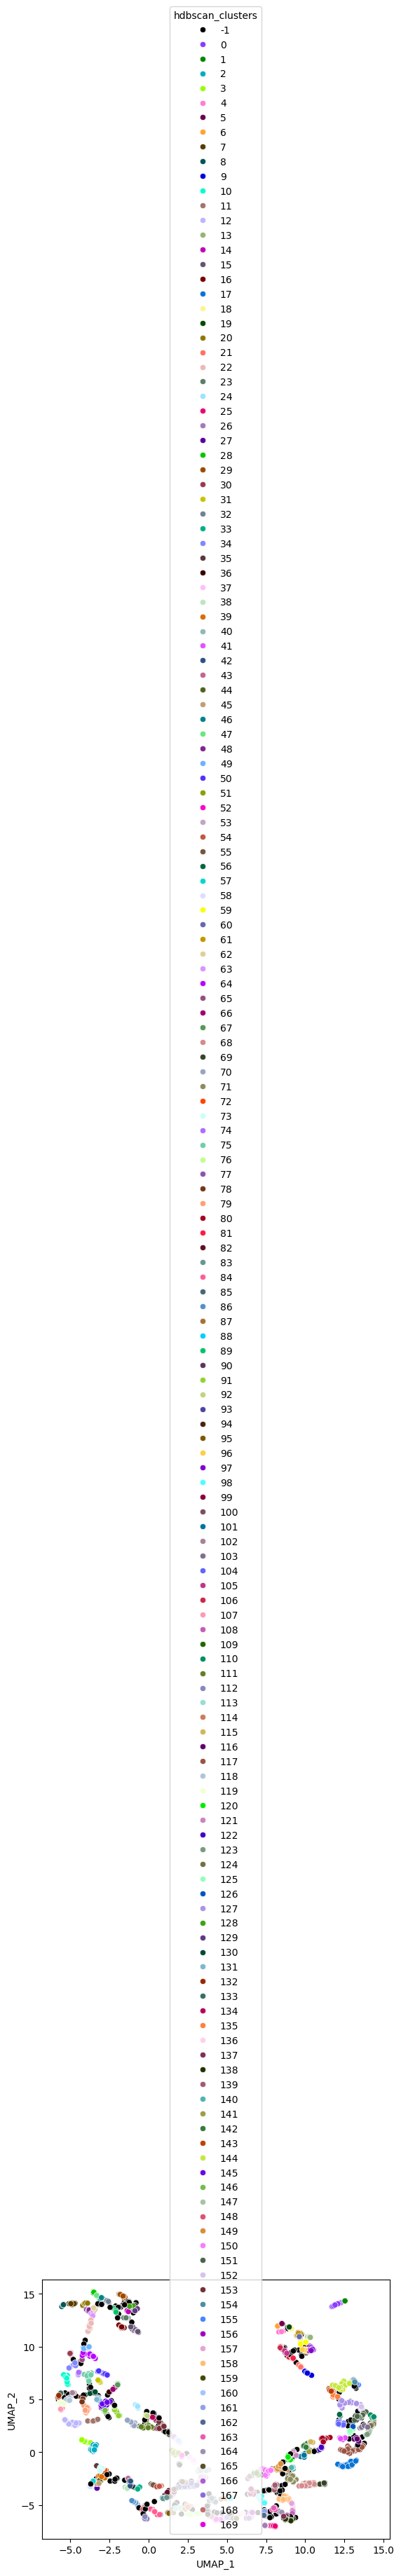

In [64]:
# Plot clusters

X_umap_transformed_df["hdbscan_clusters"] = yhat_2
# Creating a pallette of hihg contrast colors with as many color as cluster labels
custom_palette_2 = sns.color_palette(cc.glasbey, n_colors=cluster_hdbscan.size)
# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1" #(R,G,B)
custom_palette_2 = [color if cluster_hdbscan != -1 else (0.,0.,0.) for cluster_hdbscan, color in zip(cluster_hdbscan,custom_palette_2)]
sns.scatterplot(X_umap_transformed_df, x="UMAP_1", y="UMAP_2", hue="hdbscan_clusters", palette=custom_palette_2);
plt.show()

In [71]:
X_umap_transformed_df.drop(columns=["hdbscan_clusters"], inplace=True)

## DBSCAN 2 with lower epsilon

In [73]:
# Creating the clustering model again with an "adequat" epsilon. We decided to use 0.6

final_model_DBSCAN = DBSCAN(0.6)
# fit model and predict clusters
yhat_final = final_model_DBSCAN.fit_predict(X_umap_transformed_df)

filename = "final_model_DBSCAN.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(final_model_DBSCAN,file)

In [74]:
X_umap_transformed_df

UMAP_1     UMAP_2
0     -3.005601  14.619786
1      5.161488  -5.840945
2      3.513930  -2.624957
3      1.621683   0.044489
4     13.322855   1.287669
...         ...        ...
2090   8.717214  -1.541847
2091   0.983885   2.448554
2092  -5.428263  13.975108
2093   5.234474  -4.360818
2094   9.122847  -1.453459

[2095 rows x 2 columns]

In [75]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_umap_transformed_df, final_model_DBSCAN.fit_predict(X_umap_transformed_df)),2))
print("The Calinksi-Harabasz score of the model is: ",round(calinski_harabasz_score(X_umap_transformed_df, final_model_DBSCAN.fit_predict(X_umap_transformed_df)),2))

The Silhouette score of the model is:  0.17
The Calinksi-Harabasz score of the model is:  1406.05


In [76]:
yhat_final

array([0, 1, 2, ..., 0, 1, 1])

In [77]:
X['dbscan2_clusters'] = yhat_final
X.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.589   0.472    8    -8.749     1       0.0502       0.61400   
1         0.548   0.871    7    -4.253     1       0.0708       0.00113   
2         0.754   0.424    2    -8.463     1       0.0363       0.64300   
3         0.735   0.478    2   -12.472     1       0.0293       0.18900   
4         0.683   0.375    0   -13.056     1       0.0303       0.57900   

   instrumentalness  liveness  valence    tempo  cluster  dbscan_clusters  \
0          0.000000    0.5050    0.898   67.196        4                0   
1          0.000000    0.7650    0.640  128.136        6                1   
2          0.000000    0.0652    0.806  119.705        4                2   
3          0.000002    0.3550    0.947  107.682        4                3   
4          0.000000    0.0760    0.888  140.467        4                4   

   hdbscan_clusters  dbscan2_clusters  
0                46                 0  
1                -1                 1  
2                53                 2  
3                51                 3  
4               116                 4

In [78]:
# Retrieve unique clusters
cluster_dbscan2 = np.unique(yhat_final)
cluster_dbscan2 # DBSCAN flags with "-1" noisy data.

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17])

In [80]:
# Got a different value of clusters than my colleagues (they got 13 instead of 17)

[cluster_dbscan2 for cluster_dbscan2 in list(cluster_dbscan2) if cluster_dbscan2 != -1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

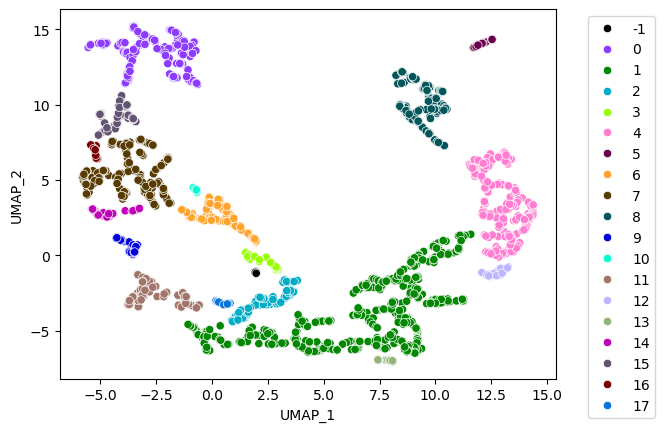

In [82]:
# Plot clusters

X_umap_transformed_df["dbscan2_clusters"] = yhat_final
# Creating a pallette of hihg contrast colors with as many color as cluster labels
custom_palette_3 = sns.color_palette(cc.glasbey, n_colors=cluster_dbscan2.size)
# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1" #(R,G,B)
custom_palette_3 = [color if cluster_dbscan2 != -1 else (0.,0.,0.) for cluster_dbscan2, color in zip(cluster_dbscan2,custom_palette_3)]
sns.scatterplot(X_umap_transformed_df, x="UMAP_1", y="UMAP_2", hue="dbscan2_clusters", palette=custom_palette_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.show()

#### Let's sum it up:

Are you going to use all the audio features? If not, which ones do you think that makes more sense to be used?
* we dropped all object columns and the timestemp column -> only numerical columns remained in the df

It might make sense to use a dimensionality reduction technique to visualize the songs with only two features?
* we tried the PCA, ISOMAP, and UMAP method and came to the conclusion that only the UMAP method meets the requirements to apply for the clustering method

What is the optimal number of clusters (for methods that need to know this beforehand)?
* we estimate a range between 8-15

What is the best distance to use?
* during the DBSCAN method we figured that the best distance (epsilon) is between 0.28-0.6
* however, when applying 0.28 we get a lot of clusters
* therefore, we decided to use an epsilon of 0.6

What clustering method provides better results?
* only the DBSCAN method provides an adequate result

Does the clustering method need a transformer?
* yes, we used the StandardScaler to transform the selected audio features and afterwards used the UMAP dimensionality reduction technique to continue working with only 2 reduced features